In [31]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize
from scipy.stats import chi2
from matplotlib.patches import Ellipse
import numpy.random as rnd
from scipy import linalg
import csv
import pandas as pd
import random


# 0.2 Signal strength and distances

## a) 

In [32]:
def Friss(P_t, r, const=20):
    # Friss function for actual signal at router
    P_r = P_t + const * np.log10(c / (4* np.pi* f* r))
    return P_r
 

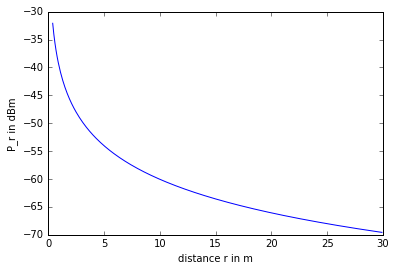

In [33]:
r = np.arange(0.4, 30, 0.1)
P_t = 0
c = 299792458
f = 2.4 * 10**9
P_r = Friss(P_t,r)
plt.plot(r, P_r)
plt.ylabel("P_r in dBm")
plt.xlabel("distance r in m")
plt.show()

Q: For which is a router more sensitive when it comes to the distance to a device, devices that are close or devices that are far away, and why?

A: It is more sensitive to devices that are close, since the absolute derivative decreases when the distance increases. So the difference between the router and the device is less accurate determined over greater distance.

## b)

$$ P_r = P_t + 20 \times log_{10}(\frac{c}{4 \pi f r}) \\
\frac{P_r - P_t}{20} =log_{10}(\frac{c}{4 \pi f r}) \\
10^{\frac{P_r - P_t}{20} }=\frac{c}{4 \pi f r} \\
r \times 10^{\frac{P_r - P_t}{20} }=\frac{c}{4 \pi f} \\
r = \frac{c}{4 \pi f \times 10^{\frac{P_r - P_t}{20} }} $$

## c)

In [34]:
def SiToR(Si, P_t):
    # Get radius from measured signal
    return abs(c/(4*math.pi*f*10**((Si-P_t)/20.0)))

In [35]:
P_t = 0
r_30 = SiToR(30, P_t)
r_31 = SiToR(31, P_t)
r_60 = SiToR(60, P_t)
r_61 = SiToR(61, P_t)
r_d1 = r_30 - r_31
r_d2 = r_60 - r_61
print ("The difference between 30 dBm and of  31 dBm is:",r_d1)
print ("The difference between 60 dBm and of  61 dBm is:",r_d2)

The difference between 30 dBm and of  31 dBm is: 3.4184176042559257e-05
The difference between 60 dBm and of  61 dBm is: 1.0809985623064794e-06


## d) 

Q: For which case does an uncertainty on the measured signal strength translate to a larger uncertainty on the distance, for a larger signal strength of e.g. 30 dBm or for a smaller signal strength of e.g. 60 dBm, and why?

A: When a packet is received two factors play a role in the uncertainty. The first is the interference from the 'real world'. When the packet has a weaker signal strength it is send from farther away and has a higher likelihood of interference thus increasing the uncertainty. The second factor is a change in the distance. According to the plot from a), if the distance is short and changes a bit the resulting signal strength varies a lot. But when the distance is large and changes by the same amount the resulting signal strength varies much less. Therefore the influence will have a smaller impact for short distances compared to large distances.


# 0.3 Position reconstruction

## e)

Q: Explain and draw an example of why there will not be an exact intersection point?

A: Because there is some noise in the measured signal intensity at the routers, and the noise measured at the three routers for the same signal will be different, the three routers will all measure a distance that is slighly different from the actual distance. Now if we look at the theoretical case of three circels with one intersection point and we change the radius of one of the circles a little bit, we see that the three circles now have no common intersection point and 6 points where two circles intersect.

<img src="intersection.png">

## f)

In [36]:
%%latex
\begin{align*}
P_r &= P_t + 20*log^{10}(\frac{c}{4\pi fr})\\
&= P_t + 20*(log^{10}(\frac{c}{4\pi f}) + log^{10}(\frac{1}{r}))\\
&= P_t + 20*(log^{10}(\frac{c}{4\pi f}) - log^{10}(r))\\
&\text{and (De Gua)}\\
r &= \sqrt{(x-x_i)^2 + (y-y_i)^2 + Z^2}\\
&\text{so we get}\\
P_r &= P_t + 20*log^{10}(\frac{c}{4\pi f}) - 20*log^{10}(\sqrt{(x-x_i)^2 + (y-y_i)^2 + Z^2})\\
 &= P_t + 20*log^{10}(\frac{c}{4\pi f}) - 10*log^{10}((x-x_i)^2 + (y-y_i)^2 + Z^2)
\end{align*}


<IPython.core.display.Latex object>

## g)

In [37]:
def getR(x1, y1, x2, y2):
    # Get R from x-, y-, z values
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2 + Z**2)

def plotGaussian(sigma, mu, bins):
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
        linewidth=2, color='r')

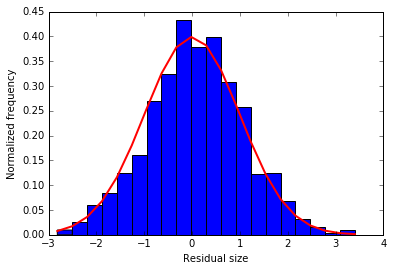

In [38]:
x_router = 0
y_router = 0
x_device = 20
y_device = 0
P_t = 0
Z = 2
#the mean and sigma used for creating the gaussian noise
mu = 0.0
sigma = 1.0

#creating the gaussian package noise
package_noise = np.random.normal(mu, sigma, 1000)

#creating the expected signal strentgh at the router
r = getR(x_router, y_router, x_device, y_device)
expected = Friss(P_t, r)

#creating the expected signal with noise
measurements = [expected + noise1 for noise1 in package_noise]

#creating the normalized residuals
normalized_residuals = [(measurement - expected)/1 for measurement in measurements]


#make the histogram plot with the gaussian plotted over it in red
count, bins, ignored = plt.hist(normalized_residuals, 20, normed=True)
plotGaussian(sigma, mu, bins)
plt.xlabel('Residual size')
plt.ylabel('Normalized frequency')
plt.show()


Q: What is the mean and the standard deviation of the pull distribution?

A: The mean is 0 and the standard deviation is 1.

## h)

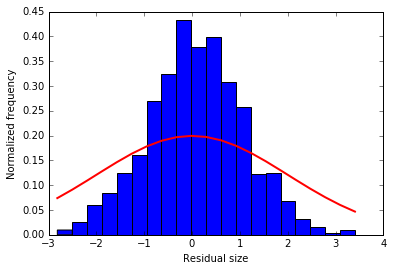

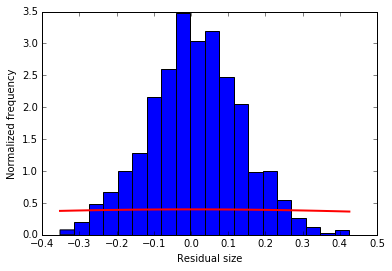

In [39]:
sigma = 2.0

#creating the gaussian package noise
package_noise = np.random.normal(mu, sigma, 1000)

#creating the normalized residuals
normalized_residuals = [(measurement - expected)/1 for measurement in measurements]

#make the histogram plot 
count, bins, ignored = plt.hist(normalized_residuals, 20, normed=True)
plotGaussian(sigma, mu, bins)
plt.xlabel('Residual size')
plt.ylabel('Normalized frequency')
plt.show()

#creating the gaussian package noise
package_noise = np.random.normal(mu, sigma, 1000)

#creating the normalized residuals by 8
normalized_residuals = [(measurement - expected)/8 for measurement in measurements]

#make the histogram plot
count, bins, ignored = plt.hist(normalized_residuals, 20, normed=True)
plotGaussian(1, mu, bins)
plt.xlabel('Residual size')
plt.ylabel('Normalized frequency')
plt.show()

Q: What happens to the pull distribution if you underestimate the noise/fluctuation/measurement uncertainties? And what will happen if you overestimate?

A: If we underestimate the noise, the standard deviation of the pull distribution becomes larger, showing values way above 1 (meaning much noise). If we overestimate the noise, the standard deviation becomes small showing values lower than 1, which would mean that there is no noise (while there actually is noise).

## i)

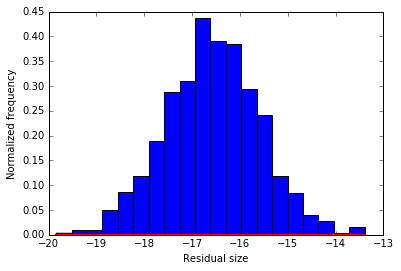

In [40]:
#sigma used for creating the gaussian noise
sigma = 1.0

#creating the gaussian package noise
package_noise = np.random.normal(mu, sigma, 1000)

#creating the expected signal strentgh at the router
P_t = 0
r = getR(x_router, y_router, x_device, y_device)
expected = Friss(P_t, r, const=20.0)

#creating the signal strentgh with factor 25 
measure_friis = Friss(P_t, r, const=25.0)

#adding the gaussian noise 
measurements = [measure_friis + noise1 for noise1 in package_noise]

#creating the normalized residuals
normalized_residuals = [(measurement - expected)/1 for measurement in measurements]


#make the histogram plot with the gaussian plotted over it in red
count, bins, ignored = plt.hist(normalized_residuals, 20, normed=True)
plotGaussian(sigma, mu, bins)
plt.xlabel('Residual size')
plt.ylabel('Normalized frequency')
plt.show()

Q: What happens to the pull distribution if you have such a systematic error in your model?

A: The mean is shifted.

## j)

Q:What do you want to see in your pull distribution to convince you that your model is correct and your uncertainties properly estimated?

A:You want to see a spread over 4 sigmas and a centration on the 0, which means the mean is at the 0 point.

# 0.4 Toy Monte Carlo

## k)

In [41]:
#create Chi-function
def chi_squared(Sis, x, y, routers=[], Z=2, sigma=1):
    chi = 0
    for i, (x_i, y_i) in enumerate(routers):
        S_i = Sis[i]
        r = math.sqrt((x - x_i)**2 + (y - y_i)**2 + Z**2)
        chi += ((Friss(P_t, r) - S_i)**2)/sigma**2
    return chi

#function to calculate signal strength at each router
def calculate_S_is(S_x, S_y, routers, noise):
    Sis = []
    for (x_i, y_i) in routers:
        if noise:
            mu = 0
            sigma = noise
            package_noise = np.random.normal(mu, sigma, 1)[0]
        else:
            package_noise = 0
        S_r = getR(x_i, y_i, S_x, S_y)

        S_i = Friss(P_t, S_r) + package_noise
        Sis.append(S_i)
    return Sis

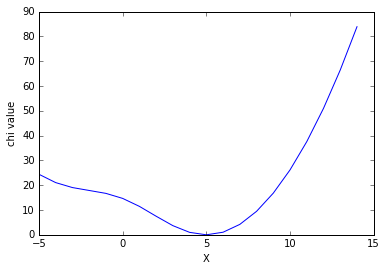

In [42]:
P_t = 0 #transmission power
Z = 2 # height of router - height of device
routers = [(0,0), (0,20), (20,20), (20, 0)] #router position
S_x = 5 #true x-position
S_y = 5 #true y-position 
noise = 0

#calculate signal strength at each router
Sis = calculate_S_is(S_x, S_y, routers, noise)
 
# list for the chi-function results
y=5
chis = [] 
for x in range(-5, 15):
    chis.append(chi_squared(Sis,x, y, routers))

#plot chis 
plt.plot(range(-5, 15), chis)
plt.xlabel("X")
plt.ylabel("chi value")
plt.show()

## l)

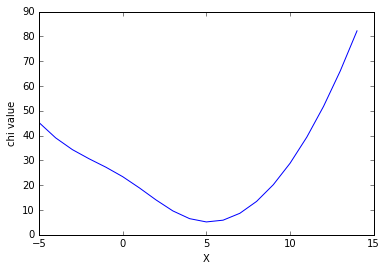

In [43]:
noise = 1

#calculate signal strength at each router with noise = 1
Sis = calculate_S_is(S_x, S_y, routers, noise)

#create list for the chi-function results
chis = []
for x in range(-5, 15):
    chis.append(chi_squared(Sis,x, y, routers))
    
#plot chis     
plt.plot(range(-5, 15), chis)
plt.xlabel("X")
plt.ylabel("chi value")
plt.show()

Q: Does the minimun occur at the true position [5,5]? And what happens to the procedure if you repeat this for several times?

A: When the test is run several times the plot changes, although the minimum is generaly around x=5.

## m)

In [44]:
#create chi-function for some point
def chi_squared_xy(xy):
    x,y = xy
    chi = chi_squared(Sis,x, y, routers)
    return chi


In [45]:
#calculate signal strength at each router with noise = 1
Sis = calculate_S_is(S_x, S_y, routers, noise)

#create list for the chi-function results
chis = []
for x in range(-5, 15):
    chis.append(chi_squared(Sis,x, y, routers))


# create minimum of chi
x0 = [0,0]
res = minimize(chi_squared_xy, x0)
print( res.x )

[ 5.28657279  4.36163821]


## n)

Q: What are the avarage x- and y-position? What is the average  $ \chi^2 $ of the minimun?

A: The answers are provided in the plot below.

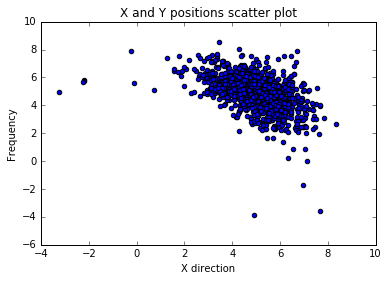

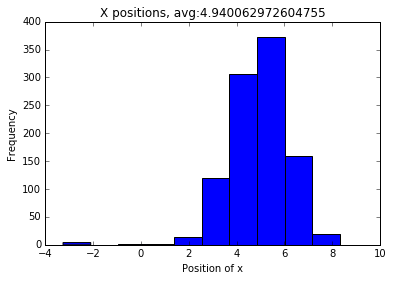

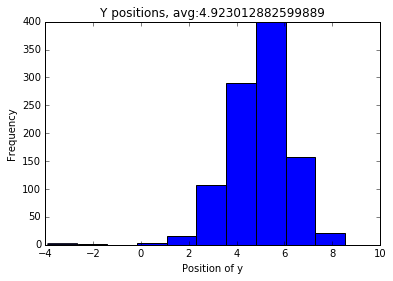

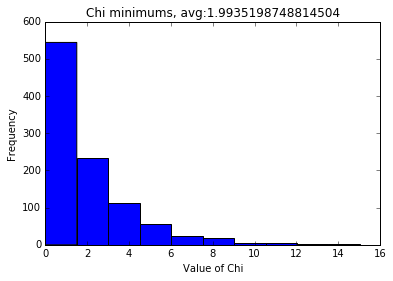

In [46]:
positions = []

Sis = calculate_S_is(S_x, S_y, routers, noise)
 
packets = range(1000)
xs = []
ys = []
min_chis = []
for packet in packets:
    Sis = calculate_S_is(S_x, S_y, routers, noise)
    x0 = [0,0]
    res = minimize(chi_squared_xy, x0)
    [x,y] = res.x
    min_chis.append(res.fun)
    xs.append(x)
    ys.append(y)

plt.scatter(xs, ys)
plt.title("X and Y positions scatter plot")
plt.xlabel('X direction')
plt.ylabel('Frequency')
plt.show()

plt.hist(xs)
plt.title("X positions, avg:{}".format(np.mean(xs)))
plt.xlabel('Position of x')
plt.ylabel('Frequency')
plt.show()

plt.hist(ys)
plt.title("Y positions, avg:{}".format(np.mean(ys)))
plt.xlabel('Position of y')
plt.ylabel('Frequency')
plt.show()


plt.hist(min_chis)
plt.title("Chi minimums, avg:{}".format(np.mean(min_chis)))
plt.xlabel('Value of Chi')
plt.ylabel('Frequency')
plt.show()


## o)

Q: Does the average $ \chi^2 $ of that minimums that you found in the previous item agree with the NDoF? 

A: The $\chi^2$ minimum is around 2, so that corresponds with our NDoF which is also 2.


## p)

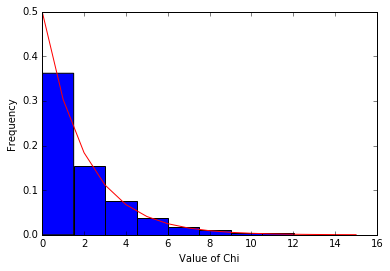

In [47]:
n, bins, patches = plt.hist(min_chis, normed=1)
mu = 0
k=2
dist = chi2(k, mu)
x = range(math.ceil(max(min_chis)))
plt.plot(x, dist.pdf(x), c='red')
plt.xlabel('Value of Chi')
plt.ylabel('Frequency')
plt.show()

## q)

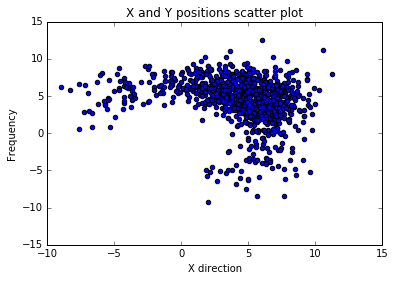

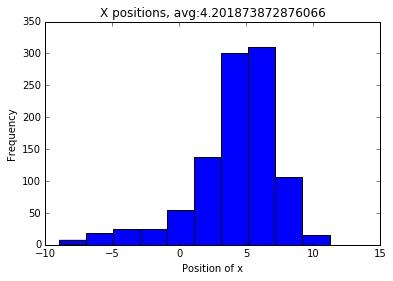

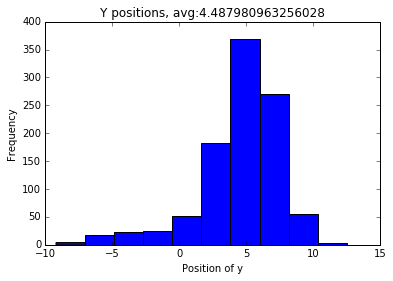

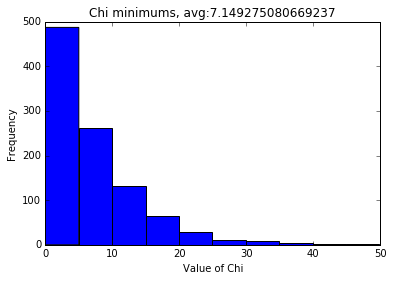

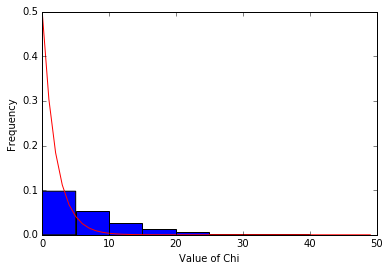

In [48]:
positions = []

noise = 2
Sis = calculate_S_is(S_x, S_y, routers, noise)

packets = range(1000)
xs = []
ys = []
min_chis = []
for packet in packets:
    Sis = calculate_S_is(S_x, S_y, routers, noise)
    x0 = [0,0]
    res = minimize(chi_squared_xy, x0)
    [x,y] = res.x
    min_chis.append(res.fun)
    xs.append(x)
    ys.append(y)

plt.scatter(xs, ys)
plt.title("X and Y positions scatter plot")
plt.xlabel('X direction')
plt.ylabel('Frequency')
plt.show()

plt.hist(xs)
plt.title("X positions, avg:{}".format(np.mean(xs)))
plt.xlabel('Position of x')
plt.ylabel('Frequency')
plt.show()

plt.hist(ys)
plt.title("Y positions, avg:{}".format(np.mean(ys)))
plt.xlabel('Position of y')
plt.ylabel('Frequency')
plt.show()


plt.hist(min_chis)
plt.title("Chi minimums, avg:{}".format(np.mean(min_chis)))
plt.xlabel('Value of Chi')
plt.ylabel('Frequency')
plt.show()

n, bins, patches = plt.hist(min_chis, normed=1)
mu = 0
k=2
dist = chi2(k, mu)
x = range(math.ceil(max(min_chis)))
plt.plot(x, dist.pdf(x), c='red')
plt.xlabel('Value of Chi')
plt.ylabel('Frequency')
plt.show()



Q: What is the average x- and y- position? What happened to the cloud of estimated device positions, and why? What is the average  2 of the minimums? Does it agree with what you expect? Does your histogram agree with what you expect from a chi-squared distribution? What happened and why?

A: The cloud of estimate device positions has a larger spread compared to the Gaussian fluctuations of 1 dBm. Which is to be expected as we added more noise.
The avarage $\chi^{2}$ is just over 7. It seems that our distribution is now a bit flatter compared to the normal $\chi^2$ distribution.

## r)

Q: What does this tell you about your estimate of the measurement/data uncertainties?
    
A: If we have 10 degrees of freedom we would expect a  $\chi^{2}$  of around 10. However when we have a  $\chi^{2}$  of 40 that suggests the real fluctiations of nois is larger than we expected. As we see in the previous question we had a larger fluctuation than the expected fluctiation, which caused the  $\chi^{2}$  to be too large.

# 0.5 Error on fit parameters

## s)

$$ \chi^2 = \sum_i (\frac{S_i-P_r^i(x,y)}{\sigma_i})^2\\
P_r^i(x,y) \approx P_r^i(x_0,y_0)+\frac{\partial P_r^i(x_0,y_0)}{\partial x}*(x-x_0)+\frac{\partial P_r^i(x_0,y_0)}{\partial y}*(y-y_0)\\
= P_0^i + P_{x,0}^i\Delta x + P_{y,0}^i\Delta y\\
\chi^2 = \sum_i (\frac{S_i-P_0^i - P_{x,0}^i\Delta x - P_{y,0}^i\Delta y}{\sigma_i})^2\\
\chi^2 = \sum_i \frac{1}{\sigma_i^2}(S_i^2 -2S_i(P_0^i+P_{x,0}^i\Delta x+ P_{y,0}^i\Delta y)+ (P_0^i)^2+ 2P_0^i(P_{x,0}^i\Delta x+ P_{y,0}^i\Delta y)+ (P_{x,0}^i\Delta x)^2 + (P_{y,0}^i\Delta y)^2 +  2P_{x,0}^iP_{y,0}^i\Delta x\Delta y)\\
S_i - P_0^i = R_0^i\\
\chi^2 = \sum_i \frac{1}{\sigma_i^2}((R_0^i)^2 - 2R_0^iP_{x,0}^i\Delta x - 2R_0^iP_{y,0}^i\Delta y+ (P_{x,0}^i\Delta x)^2 + (P_{y,0}^i\Delta y)^2 + 2P_{x,0}^iP_{y,0}^i\Delta x\Delta y) $$

## t)

$$\sum_i \frac{1}{\sigma^2}R_0^iP_{x,0}^i = 0\\
\sum_i \frac{1}{\sigma^2}R_0^iP_{y,0}^i = 0\\
%\sum_i \frac{1}{\sigma^2}P_{x,0}^iP_{y,0}^i\Delta x\Delta y &\approx 0\\
\chi^2 = \sum_i \frac{1}{\sigma_i^2}((R_0^i)^2 + (P_{x,0}^i\Delta x)^2 + (P_{y,0}^i\Delta y)^2 + 2P_{x,0}^iP_{y,0}^i\Delta x\Delta y)$$

## u)

In [49]:
%%latex

\begin{align*}
\chi^2 = \sum_i \frac{1}{\sigma_i^2}((R_0^i)^2 + (P_{x,0}^i\Delta x)^2 + (P_{y,0}^i\Delta y)^2
                                      + 2P_{x,0}^iP_{y,0}^i\Delta x\Delta y)\\
\chi^2 = \chi_0^2 + \sum_i \frac{1}{\sigma_i^2}((P_{x,0}^i\Delta x)^2 + (P_{y,0}^i\Delta y)^2
                                      + 2P_{x,0}^iP_{y,0}^i\Delta x\Delta y)\\
= A + 
\left(
\begin{array}{c}
\Delta x & \Delta y
\end{array}
\right)
* B *
\left(
\begin{array}{cc}
\Delta x \\
\Delta y
\end{array}
\right)\\

\left(
\begin{array}{c}
\Delta x & \Delta y
\end{array}
\right)

\left(
\begin{array}{cc}
a & b\\
c & d\\
\end{array}
\right) 

\left(
\begin{array}{cc}
\Delta x \\
\Delta y
\end{array}
\right)
= (\Delta x)^2 a + \Delta x\Delta y(b+c) + (\Delta y)^2 d\\
a = (P_{x,0}^i)^2\\
b + c = 2P_{x,0}^iP_{y,0}^i\\
b = c = P_{x,0}^iP_{y,0}^i\\
d = (P_{y,0}^i)^2\\

A = \chi_0^2\\
B = \sum_i \frac{1}{\sigma_i^2}
\left(
\begin{array}{cc}
(P_{x,0}^i)^2 & P_{x,0}^iP_{y,0}^i\\
P_{x,0}^iP_{y,0}^i & (P_{y,0}^i)^2\\
\end{array}
\right)

\end{align*}

<IPython.core.display.Latex object>

## v)

To find the maximal $\Delta x$ or $\Delta y$ to raise $\chi^2$ by one, the $\chi_0^2$ can be disregarded.

In [50]:
%%latex
\begin{align*}

\chi^2 &= 

\left(
\begin{array}{c}
\Delta x & \Delta y
\end{array}
\right)

\left(
\begin{array}{cc}
\sum_iP_{x,0}^2 & \sum_iP_{x,0}P_{y,0}\\
\sum_iP_{x,0}P_{y,0} & \sum_iP_{y,0}^2
\end{array}
\right) 

\left(
\begin{array}{cc}
\Delta x \\
\Delta y
\end{array}
\right)\\
&=
\left(
\begin{array}{c}
\Delta x & \Delta y
\end{array}
\right)

B

\left(
\begin{array}{cc}
\Delta x \\
\Delta y
\end{array}
\right)
=1\\

\left(
\begin{array}{cc}
\Delta x_{max}^2 \\
\Delta y_{max}^2
\end{array}
\right)
&= Tr(B^{-1})\\
&= 
\frac{1}{B_{11}B_{22}-B_{12}^2}
Tr\left(
\begin{array}{cc}
B_{22} & -B_{12}\\
-B_{12} & B_{11}
\end{array}
\right)\\
\Delta x_{max}^2 &= \frac{\sum_iP_{y,0}^2}{\sum_iP_{x,0}^2P_{y,0}^2 - (\sum_iP_{x,0}P_{y,0})^2}\\
\Delta y_{max}^2 &= \frac{\sum_iP_{x,0}^2}{\sum_iP_{x,0}^2P_{y,0}^2 - (\sum_iP_{x,0}P_{y,0})^2}\\

\end{align*}

<IPython.core.display.Latex object>

## w)

$$\frac{\partial P_r}{\partial x}= \frac{\partial}{\partial x}(P_t)+20 \times \log_{10}(\frac{c}{4\pi f})-20\log_{10}(r) )\\
= \frac{\partial}{\partial x} (-10 \times \frac{\ln (r^2)}{\ln (10)})\\
= \frac{-10}{\ln (10)}\times \frac{1}{r^2}\times \frac{\partial r^2 }{\partial x}\\
r = \sqrt{(x-x_i)^2+(y-y_i)^2+Z^2}\\
\frac{\partial r^2}{\partial x} = 2(x-x_i) = 2 \Delta x\\
\Rightarrow \frac{\partial P_r}{\partial x}=\frac{-10}{\ln (10)} \times \frac{2\Delta x}{r^2}$$
and in the same way:
$$\Rightarrow \frac{\partial P_r}{\partial y}=\frac{-10}{\ln (10)} \times \frac{2\Delta y}{r^2}$$

In [51]:
def locationScore(xy):
    # Optimalization function for simulated packets.
    # Function that scores the certainty of the 
    # current xy position for optimize function
    x, y = xy
    score = 0
    for n, r in enumerate(routers):
        routerx = r[0]
        routery = r[1]
        tryRadial2 = (x - routerx)**2 + (y - routery)**2
        score += (radials[n]**2 - tryRadial2)**2
    return score

def getD(d, r):
    # Get partial derivative of Pr
    # r is the radius
    return (-20/math.log(10))*(d/(float(r)**2))

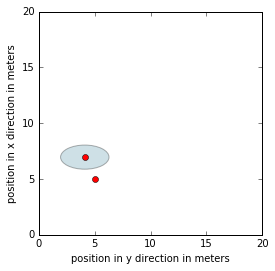

In [52]:
# Constants
P_t = 0

routers = [(0,0), (0,20), (20,20), (20, 0)]
S_x = 5
S_y = 5
signalSigma = 1
routerSigma = 1.5
# Simulate wifi packet (plus noise) and 
# triangulate onto the position
Sis = calculate_S_is(S_x, S_y, routers, signalSigma)
radials = [SiToR(Si, P_t) for Si in Sis]
triangulate = minimize(locationScore, [10,10])
measuredx, measuredy = triangulate.x

# Calculate the x and y errors (for ellipses)
Pxs, Pys = [], []
for router in routers:
    x, y = router
    deltax = measuredx - x
    deltay = measuredy - y
    r = getR(measuredx, measuredy, x, y)
    Pxs.append(getD(deltax, r))
    Pys.append(getD(deltay, r))
Pxs, Pys = np.array(Pxs), np.array(Pys)

B = np.array([
        [sum(Pxs**2),  sum(Pxs*Pys)],
        [sum(Pxs*Pys), sum(Pys**2) ]
    ])/routerSigma**2

Binv = linalg.inv(B)
xerror = Binv[0][0]
yerror = Binv[1][1]

uncertainty = (xerror, yerror)

# Plot ellipse
fig = plt.figure(0)
ax = fig.add_subplot(111, aspect='equal')
e = Ellipse(xy=(measuredx, measuredy), width=xerror, height=yerror)
e.set_alpha(0.3)
e.set_facecolor(rnd.rand(3))
ax.add_artist(e)

# Plot actual send point
ax.plot([S_x, measuredx], [S_y, measuredy], 'ro')
ax.set_xlabel('position in y direction in meters')
ax.set_ylabel('position in x direction in meters')

ax.set_xlim(0, 20)
ax.set_ylim(0, 20)
plt.show()


## x) $\uparrow$

## y)

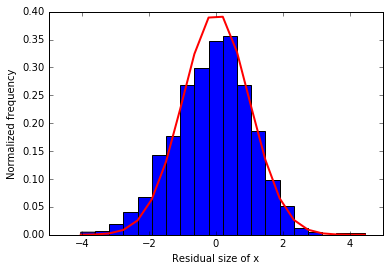

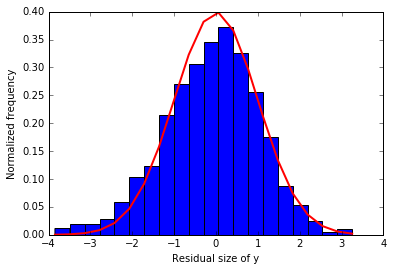

In [53]:
xs = []
ys = []

for i in range(1000):
    # Simulate wifi packet (plus noise) and 
    # triangulate onto the position
    Sis = calculate_S_is(S_x, S_y, routers, signalSigma)
    radials = [SiToR(Si, P_t) for Si in Sis]
    triangulate = minimize(locationScore, [10,10])
    measuredx, measuredy = triangulate.x
    xs.append(measuredx)
    ys.append(measuredy)

routerSigma = 1.5

newxs = [(x - 5)/routerSigma for x in xs]
newys = [(y - 5)/routerSigma for y in ys]
count, bins, ignored = plt.hist(newxs, 20, normed=True)
plotGaussian(sigma, mu, bins)
plt.xlabel('Residual size of x')
plt.ylabel('Normalized frequency')
plt.figure()
count, bins, ignored = plt.hist(newys, 20, normed=True)
plotGaussian(sigma, mu, bins)
plt.xlabel('Residual size of y')
plt.ylabel('Normalized frequency')
plt.show()

## z)

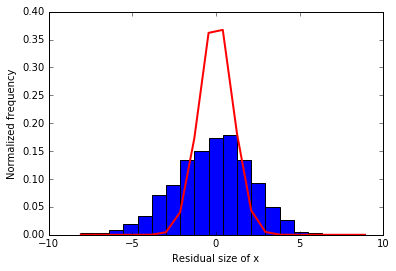

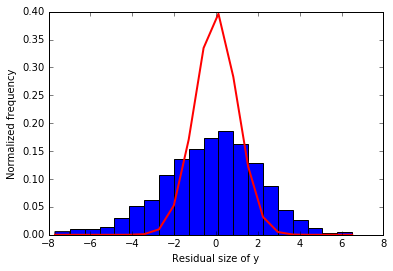

In [54]:
routerSigma /= 2
newxs = [(x - 5)/routerSigma for x in xs]
newys = [(y - 5)/routerSigma for y in ys]
count, bins, ignored = plt.hist(newxs, 20, normed=True)
plotGaussian(sigma, mu, bins)
plt.xlabel('Residual size of x')
plt.ylabel('Normalized frequency')
plt.show()
plt.figure()
count, bins, ignored = plt.hist(newys, 20, normed=True)
plotGaussian(sigma, mu, bins)
plt.xlabel('Residual size of y')
plt.ylabel('Normalized frequency')
plt.show()

Q: What would happen to your estimated errors on the x and y positions if you underestimate your measurement error by a factor 2?

A: The spread of the measurents is more than we expected, based on our estimated error

# 0.6.1 Wifi tracking

In [55]:
fname = 'UvA-wifitracking-exercise-prepped-data.csv'

#configuring the coordinates of the routers
named_routers = {
            "Lima": (5.82, 5.48),
            "Mike": (11.33, 9.43),
            "Kilo": (12.39, 6.77),
            "Oscar": (2.48, 7.36),
            "Alpha": (8.53, 2.16),
            "India": (2.18, 5.61),
            "November": (8.34, 4.13),
            "Hotel": (5.43, 4.71),
            "Romeo": (10.99, 5.94),
            "Quebec": (6.82, 9.78),
            "Papa": (9.9, 10.39)
          }

c = 299792458
f = 2.4 * 10**9
Z = 2 # height of router - height of device = 3-1
sigma = 7.58 # obtained by fitting the normalised resitual to a normal distribution with np.std()

def triangulate(routers, signals):
    #print("TRIANGULATING!!!! WOOOO")
    triangulate = minimize(calculate_chi2, [10,10, -15])
    measuredx, measuredy, P_t = triangulate.x
    pos = (measuredx, measuredy)
    if P_t >= 0:
        return pos, (None, None), P_t

    Pxs, Pys = [], []
    for router in routers:
        x, y = router
        deltax = measuredx - x
        deltay = measuredy - y
        r = getR(measuredx, measuredy, x, y)
        Pxs.append(getD(deltax, r))
        Pys.append(getD(deltay, r))
    Pxs, Pys = np.array(Pxs), np.array(Pys)
    
    B = np.array([
            [sum(Pxs**2),  sum(Pxs*Pys), sum(Pxs)],
            [sum(Pxs*Pys), sum(Pys**2),  sum(Pys)],
            [sum(Pxs),     sum(Pys),     1       ]
        ])/sigma**2
    
    Binv = linalg.inv(B)
    xerror = Binv[0][0]
    yerror = Binv[1][1]
        
    uncertainty = (xerror, yerror)
    return pos, uncertainty, P_t

def plot_pos_uncertainty(pos, uncertainty, fig, ax):
    # Plot the uncertainties around the positions in one plot
    (x,y) = pos
    (width, height) = uncertainty
    ellipse = matplotlib.patches.Ellipse(pos, width, height, linewidth=1, fc='b', fill=True, alpha=0.3)
    ax.plot(x,y, 'o')
    ax.add_artist(ellipse)
    # ax.axis([-5,20,-5,20])
    return


   
def calculate_chi2(xyPt):
    # Function that scores the goodness of the 
    # current xy position for optimize function
    x, y, P_t = xyPt
    chi2 = 0
    for n, router in enumerate(routers):
        routerx, routery = router
        r = getR(routerx, routery, x, y)
        expected = Friss(P_t, r)
        signal = signals[n]
        chi2 += (signal - expected)**2
    return chi2

## a)

In [56]:
df = pd.read_csv(fname)
packets = df.groupby(['typeNr', 'subTypeNr', 'seqNr'])

## b) c) d) e) f)

Reculculating $\chi^2$ with additional paramter for the transmission
$$ \chi^2 = \sum_i (\frac{S_i-P_r^i(x,y,t)}{\sigma_i})^2\\
P_r^i(x,y,t) \approx P_r^i(x_0,y_0,t_0)+\frac{\partial P_r^i(x_0,y_0,t_0)}{\partial x}*(x-x_0)+\frac{\partial P_r^i(x_0,y_0,t_0)}{\partial y}*(y-y_0)+\frac{\partial P_r^i(x_0,y_0,t_0)}{\partial t}*(t-t_0)\\
S_i - P_0^i = R_0^i\\
\text{and with } \frac{\partial \chi^2}{\partial x}=0, \frac{\partial \chi^2}{\partial y}=0,\frac{\partial \chi^2}{\partial t}=\frac{2}{\sigma^2}\sum_i(S_i-P_r)P_{t,0}=0\\
\chi^2 = \sum_i \frac{1}{\sigma_i^2}((R_0^i)^2 + (P_{x,0}^i\Delta x)^2 + (P_{y,0}^i\Delta y)^2 + (P_{t,0}^i\Delta t)^2 2P_{x,0}^i\Delta x(P_{y,0}^i\Delta y +P_{t,0}^i\Delta t)+ 2P_{t,0}^i\Delta tP_{y,0}^i\Delta y )$$

Therefore $B$ becomes:

In [57]:
%%latex
\begin{align*}

A = 
\sum_i \frac{1}{\sigma_i^2}(R_0^i)^2=\chi_0^2\\
B = \sum_i \frac{1}{\sigma_i^2}
\left(
\begin{array}{cc}
(P_{x,0}^i)^2 & P_{x,0}^iP_{y,0}^i & P_{x,0}^iP_{t,0}^i\\
P_{x,0}^iP_{y,0}^i & (P_{y,0}^i)^2 & P_{y,0}^iP_{t,0}^i\\
P_{x,0}^iP_{t,0}^i & P_{y,0}^iP_{t,0}^i & (P_{t,0}^i)^2\\
\end{array}
\right)
\end{align*}

where $P_{t,0}^i = 1$

<IPython.core.display.Latex object>

In [58]:
def triangulate_packets(packets):

    #rebuild the routers list per packet
    uncertainties = []
    Pts = []
    positions = []
    routerlist = []
    uncertaintylist = []
    residuals = []
    fig, ax = plt.subplots()
#     ax.axis([0,15,0,15])
    for packet in packets:
        global routers, signals
        routers = []
        signals = []
        if len(packet[1]) < 4:
            continue
        print("working with {} packets".format(len(packet[1])))
        for row in packet[1].iterrows():
            droneId = row[1].loc['droneId']
            signal =  row[1].loc['signal']
            routers.append(named_routers[droneId])
            signals.append(signal)
        if len(set(routers)) < 4:
            continue
        pos, uncertainty, P_t = triangulate(routers, signals)
        if P_t >= -5:
            continue
        positions.append(pos)
        uncertainties.append(uncertainty)
        plot_pos_uncertainty(pos, uncertainty, fig, ax)
        for n, signal in enumerate(signals):
            x1, y1 = routers[n]
            x2, y2 = pos
            r = getR(x1, y1, x2, y2)
            expected = Friss(P_t, r)
            residuals.append(signal-expected)
        
        Pts.append(P_t)
        
        uncertaintylist.append(uncertainty[0])
        routerlist.append(len(routers))

    
    #make plot for locations
    x = [p[0] for p in positions]
    y = [p[1] for p in positions]
    ax.plot(x,y)
    ax.set_title('Positions and their uncertainties')
    ax.set_xlabel('position in y direction in meters')
    ax.set_ylabel('position in x direction in meters')
    fig.show()
    
    
    plt.figure()

    #make the histogram plot the powers
    count, bins, ignored = plt.hist(Pts, 20, normed=True)
    plt.grid(True, which='major')
    plt.xlabel('Stength of P_t\'s')
    plt.ylabel('Normalized frequency')
    plt.title('P_t\'s')
    
    # Degrees of freedom uncertainty plot
    plt.figure()
    plt.xlabel('Number of routers')
    plt.ylabel('Uncertainty')
    plt.scatter(routerlist, uncertaintylist)
    
    #Calculate the residuals
    routerSigma = np.std(residuals)
    normResiduals = np.array(residuals)/routerSigma
    print('Sigma:')
    print(routerSigma)
    #make the histogram of the normalised residual
    plt.figure()
    count, bins, ignored = plt.hist(normResiduals, 20, normed=True)
    plotGaussian(1, mu, bins)
    plt.grid(True, which='major')
    plt.title('Normalised residual')
    plt.xlabel('Residual size')
    plt.ylabel('Normalized frequency')
    plt.show()
    
    #Calculate and show the resolutions
    xuncertainty = [u[0] for u in uncertainties]
    yuncertainty = [u[1] for u in uncertainties]
    print("x resolution: {:.2f}\t y resolution:{}".format(np.mean(xuncertainty), np.mean(yuncertainty)))
    print("mean transmisison power: {}".format(np.mean(Pts)))
    
    return

working with 5 packets
working with 18 packets
working with 19 packets
working with 11 packets
working with 14 packets
working with 4 packets
working with 17 packets
working with 20 packets
working with 7 packets
working with 14 packets
working with 11 packets
working with 4 packets
working with 20 packets
working with 10 packets
working with 6 packets
working with 5 packets
working with 7 packets
working with 7 packets
working with 10 packets
working with 5 packets
working with 8 packets


C:\Users\Celeste\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Sigma:
7.57811542429


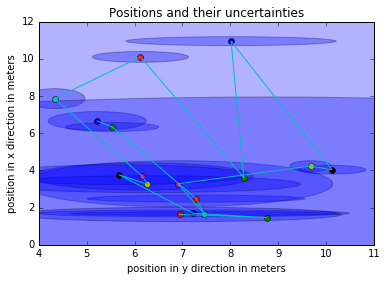

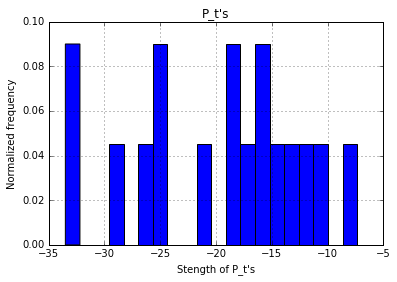

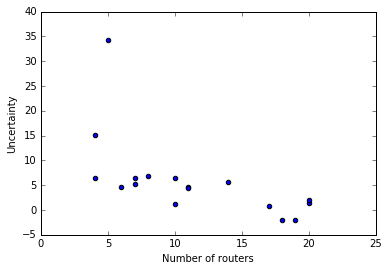

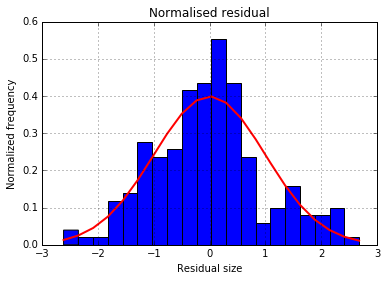

x resolution: 5.98	 y resolution:2.021285332548676
mean transmisison power: -19.70198444927999


In [59]:
triangulate_packets(packets)

By plotting the normalised residual and fitting it to a normal distribution with np.std() we obtained the average expected error of the routers. We chose to not do this for every router seperately, but rather we found an average sigma of all the routers.

working with 16 packets
working with 17 packets
working with 21 packets
working with 19 packets
working with 18 packets
working with 14 packets
working with 21 packets
working with 4 packets
working with 8 packets
working with 34 packets
working with 6 packets
working with 9 packets
working with 4 packets
working with 4 packets
working with 6 packets
working with 5 packets
working with 5 packets
working with 4 packets


C:\Users\Celeste\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Sigma:
6.47291098355


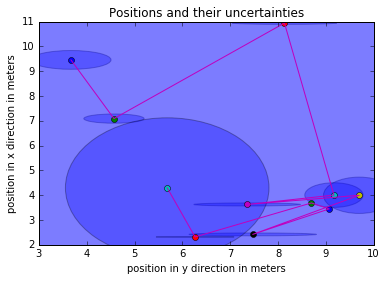

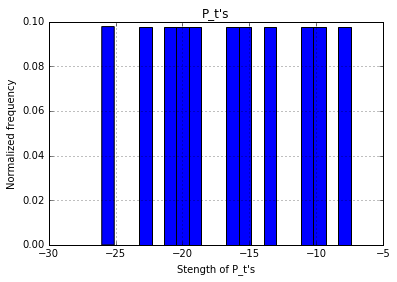

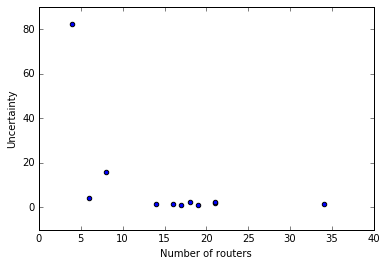

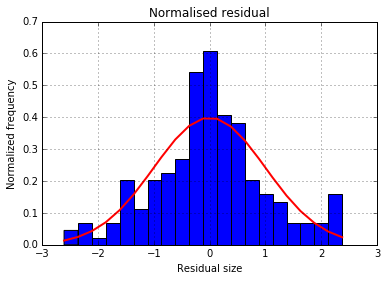

x resolution: 10.62	 y resolution:25.15204844458267
mean transmisison power: -16.548814440758164


In [60]:
df = pd.read_csv(fname)
df['delta_time'] = df['measurementTimestamp'].diff().fillna(0)
df['time_label'] = np.nan
time_labels = []
current_label = 0
for row in df.iterrows():
    data = row[1]
    if not current_label:
        current_label = 1
    else:
        if data['delta_time'] > 20:
            current_label += 1
    time_labels.append(current_label)
df['time_label'] = pd.Series(time_labels)        
packets = df.groupby(['time_label'])
triangulate_packets(packets)